In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import seaborn as sns
import visuals as vs
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# Pretty display for notebooks
%matplotlib inline

In [2]:
data = pd.read_csv("..\Datasets\water\water_potability.csv")

In [3]:
display(data.head(n=10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
print(data.isna().sum().sum())
print(data.isnull().sum())
print(data.shape)

1434
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
(3276, 10)


In [5]:
data = data.fillna(data.mean())
#data = data.dropna()
display(data.head(n=10))
print(data.isna().sum().sum())
print(data.isnull().sum())
print(data.shape)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
(3276, 10)


In [6]:
print(data.describe())
print(data["Potability"].unique())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


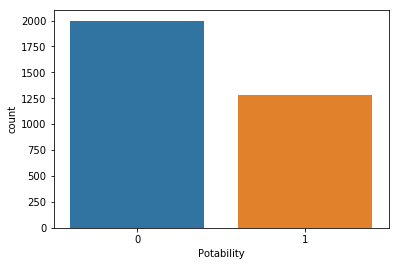

In [7]:
plt = sns.countplot(data['Potability'])

In [8]:
output = data[['Potability']]
features = data.drop(columns='Potability')


In [9]:
# Import train_test_split
# Split into training, validation and testing.
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, output, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2620 samples.
Testing set has 656 samples.


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2096 samples.
Validation set has 524 samples.
Testing set has 656 samples.


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # default=(0, 1)
# Do scaling on training. Apply the same transformation to validation and testing.
X_train_np = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_np,columns=X_train.columns)
X_val_np = scaler.transform(X_val)
X_val_std = pd.DataFrame(data=X_val_np,columns=X_train.columns)
X_test_np = scaler.transform(X_test)
X_test_std = pd.DataFrame(data=X_test_np,columns=X_train.columns)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


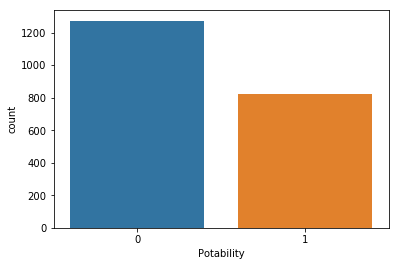

In [12]:
y_train.describe()
plt = sns.countplot(y_train["Potability"])


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


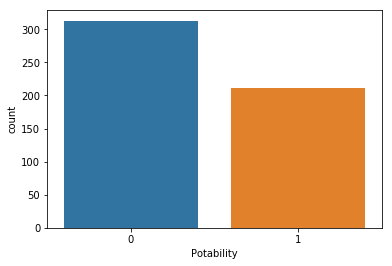

In [13]:
plt = sns.countplot(y_val["Potability"])


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


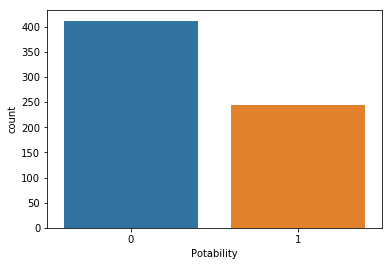

In [14]:
plt = sns.countplot(y_test["Potability"])

# Training and Validation

Create a function to train and predict the selected learner.

In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[0:sample_size],y_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the training samples which is y_train
    results['prc_train'] = precision_score(y_train[0:sample_size],predictions_train)
    
     # TODO: Compute accuracy on test set using accuracy_score()
    results['prc_test'] = precision_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[0:sample_size],predictions_train,beta=1.)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1.)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results



The dimensions are reduced from (n,) to (n).

In [16]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()

Classifiers want the X values as object type.

In [17]:
X_train_std = X_train_std.astype('object')
X_val_std = X_val_std.astype('object')
X_test_std = X_test_std.astype('object')


#Check if cross validation helps

In [18]:
from sklearn import tree
from sklearn.model_selection import cross_validate
cv = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split = 5, random_state=42)
cv_results = cross_validate(cv, X_train, y_train, cv=5)
sorted(cv_results.keys())
cv_results['test_score']

array([0.63333333, 0.61813842, 0.60859189, 0.60620525, 0.66587112])

In [52]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



# TODO: Initialize the three models
clf_1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split = 5, random_state=42)
clf_2 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter = 10000, random_state=42, activation = 'relu',
                      early_stopping = True, n_iter_no_change = 100)
clf_3 = AdaBoostClassifier(random_state=42)
clf_4 = svm.SVC(random_state=42,gamma=1,kernel='rbf')
clf_5 = KNeighborsClassifier(n_neighbors=5)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_1, clf_2, clf_3, clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train_std, y_train, X_test_std, y_test)
        if clf == clf_2:
            print(clf.n_iter_)

# Run metrics visualization for the three supervised learning models chosen

DecisionTreeClassifier trained on 20 samples.
DecisionTreeClassifier trained on 209 samples.
DecisionTreeClassifier trained on 2096 samples.
MLPClassifier trained on 20 samples.
113
MLPClassifier trained on 209 samples.
139
MLPClassifier trained on 2096 samples.
392
AdaBoostClassifier trained on 20 samples.
AdaBoostClassifier trained on 209 samples.
AdaBoostClassifier trained on 2096 samples.
SVC trained on 20 samples.
SVC trained on 209 samples.


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC trained on 2096 samples.
KNeighborsClassifier trained on 20 samples.
KNeighborsClassifier trained on 209 samples.
KNeighborsClassifier trained on 2096 samples.


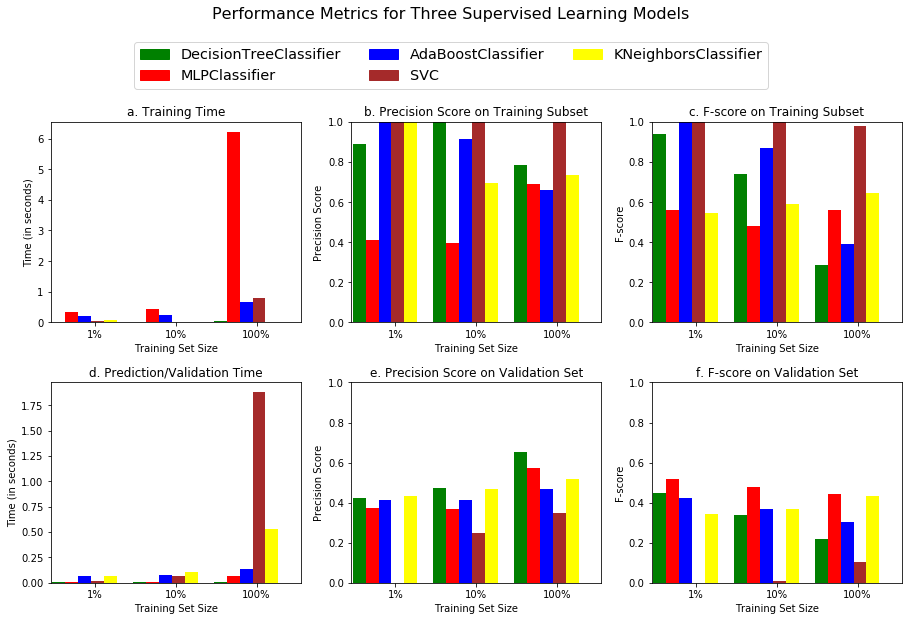

In [20]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.16
    colors = ['green','red','blue', 'brown', 'yellow']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'prc_train', 'f_train', 'pred_time', 'prc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Precision Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Precision Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("a. Training Time")
    ax[0, 1].set_title("b. Precision Score on Training Subset")
    ax[0, 2].set_title("c. F-score on Training Subset")
    ax[1, 0].set_title("d. Prediction/Validation Time")
    ax[1, 1].set_title("e. Precision Score on Validation Set")
    ax[1, 2].set_title("f. F-score on Validation Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.7), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.1)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()
evaluate(results)

# Decision Tree Hyperparameter Optimization

In [21]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=42, criterion = "gini")

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'min_samples_leaf': [2, 4, 6],
              'min_samples_split': [2, 5, 10],
              'max_depth': [3,5,7,9,10,12,15,20]}

# TODO: Make a precision scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=1.)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_std,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_std, y_train)).predict(X_val_std)
best_predictions = best_clf.predict(X_val_std)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1., average ="macro")))
print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1., average ="macro")))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Unoptimized model
------
Accuracy score on validation data: 0.5706
F-score on validation data: 0.5566

Optimized Model
------
Final accuracy score on the validation data: 0.5878
Final F-score on the validation data: 0.5642


In [22]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [23]:
#max_depth validation curve
from copy import deepcopy
learner = deepcopy(best_clf)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
for i, depth in enumerate(list(range(2,22,2))):
    learner = learner.set_params(max_depth=depth)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(depth)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    
#min_samples_leaf validation curve
learner = learner.set_params(max_depth=16)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(list(range(1,20))):
    learner = learner.set_params(min_samples_leaf=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    
    

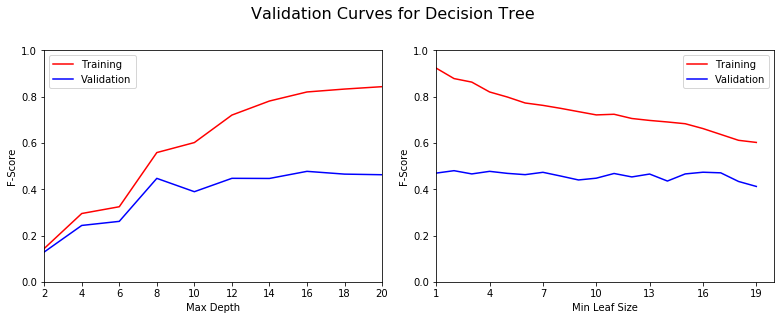

In [24]:

# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(results["X"])
ax[0].legend()
ax[0].set_xlabel("Max Depth")
ax[0].set_ylabel("F-Score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((2, 20))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 20, 3)))
ax[1].legend()
ax[1].set_xlabel("Min Leaf Size")
ax[1].set_ylabel("F-Score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 20))


# Aesthetics
pl.suptitle("Validation Curves for Decision Tree", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()
    

In [25]:
from sklearn.metrics import recall_score
final_tree_learner = learner.set_params(max_depth = 16, min_samples_leaf = 3)
final_tree_learner = final_tree_learner.fit(X_train_std,y_train)

final_predictions = final_tree_learner.predict(X_test_std)
print(final_tree_learner.get_params())
print("")
print("Final Precision on the testing data: {:.4f}".format(precision_score(y_test, final_predictions)))
print("Final Accuracy on the testing data: {:.4f}".format(accuracy_score(y_test, final_predictions)))
print("Final Recall on the testing data: {:.4f}".format(recall_score(y_test, final_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta=1.)))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Final Precision on the testing data: 0.4504
Final Accuracy on the testing data: 0.5915
Final Recall on the testing data: 0.4467
Final F-score on the testing data: 0.4486


# Neural Network Hyper Parameter Optimization


0.40909090909090906


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


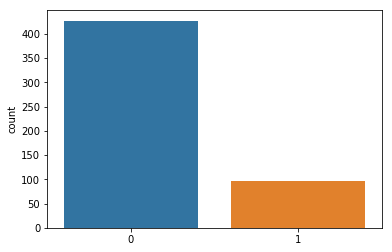

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(15, 15), max_iter = 100000, random_state=42, activation = 'relu',
                      early_stopping = True, n_iter_no_change = 100)
clf = clf.fit(X_train_std,y_train)
predictions = clf.predict(X_val_std)
print(fbeta_score(y_val, predictions,beta=1))
plt = sns.countplot(predictions)

In [27]:
#no of layers
learner = MLPClassifier(hidden_layer_sizes=(15, 15), max_iter = 100000, random_state=42,
                      early_stopping = True, n_iter_no_change = 100)
learner = learner.set_params(activation="tanh",solver="lbfgs",max_iter=100000)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [(15), (15, 15), (15, 15, 15), (15, 15, 15, 15), (15, 15, 15, 15, 15), (15, 15, 15, 15, 15, 15)
     , (15, 15, 15, 15, 15, 15, 15)]
for i, param in enumerate(l):
    learner = learner.set_params(hidden_layer_sizes = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(i+1)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    


In [28]:
#no of neurons
#learner = deepcopy(best_clf)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
l = [(5,), (10,), (15,), (20,), (25,), (30,)]
for i, param in enumerate(l):
    print(param)
    learner = learner.set_params(hidden_layer_sizes=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param[0])
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))

(5,)
(10,)
(15,)
(20,)
(25,)
(30,)


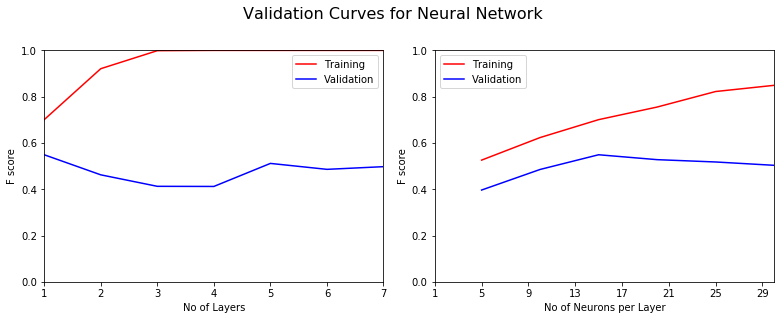

In [29]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(results["X"])
ax[0].legend()
ax[0].set_xlabel("No of Layers")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 7))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 30, 4)))
ax[1].legend()
ax[1].set_xlabel("No of Neurons per Layer")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 30))


# Aesthetics
pl.suptitle("Validation Curves for Neural Network", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [32]:
final_nn =deepcopy(learner)
final_nn = final_nn.set_params(hidden_layer_sizes=(15,))
final_nn = final_nn.fit(X_train_std,y_train)
final_predictions = final_nn.predict(X_test_std)
print(final_nn.get_params())
print("")
print("Final Precision on the testing data: {:.4f}".format(precision_score(y_test, final_predictions)))
print("Final Accuracy on the testing data: {:.4f}".format(accuracy_score(y_test, final_predictions)))
print("Final Recall on the testing data: {:.4f}".format(recall_score(y_test, final_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta=1.)))

{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (15,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Final Precision on the testing data: 0.5157
Final Accuracy on the testing data: 0.6387
Final Recall on the testing data: 0.4713
Final F-score on the testing data: 0.4925


In [38]:
final_nn.n_iter_

2334

# Optimization of Boosting Hyperparameters

In [39]:
# TODO: Initialize the classifier

clf = AdaBoostClassifier(random_state=42)
base = [tree.DecisionTreeClassifier(max_depth=1)]
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'base_estimator': base,
              'n_estimators': list(range(10,100,5))}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=1)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_std,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_std, y_train)).predict(X_val_std)
best_predictions = best_clf.predict(X_val_std)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on validation data: {:.4f}".format(precision_score(y_val, predictions)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1.)))
print("\nOptimized Model\n------")
print("Final precision score on the validation data: {:.4f}".format(precision_score(y_val, best_predictions)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1.)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Unoptimized model
------
Precision score on validation data: 0.4592
F-score on validation data: 0.2913

Optimized Model
------
Final precision score on the validation data: 0.4300
Final F-score on the validation data: 0.2765


In [40]:
best_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 1.0,
 'n_estimators': 65,
 'random_state': 42}

In [41]:
#no of weak learners
learner = deepcopy(best_clf)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
for i, param in enumerate(list(range(1,100))):
    learner = learner.set_params(n_estimators = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    

    
    

In [42]:
#max depth
learner = learner.set_params(n_estimators=98)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(list(range(1,15))):
    learner = learner.set_params(base_estimator__max_depth=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))

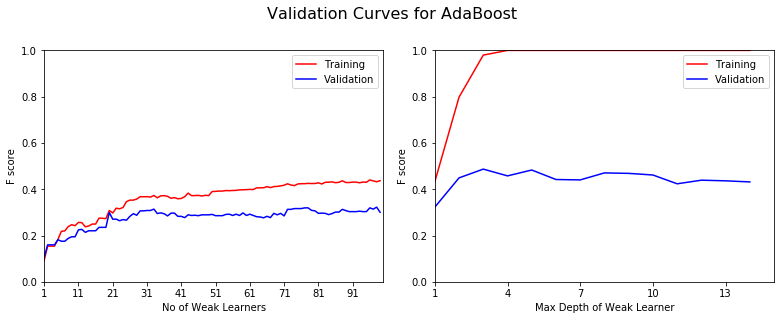

In [43]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("No of Weak Learners")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 100))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 15, 3)))
ax[1].legend()
ax[1].set_xlabel("Max Depth of Weak Learner")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 15))


# Aesthetics
pl.suptitle("Validation Curves for AdaBoost", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [44]:
final_ADB = deepcopy(learner)
final_ADB.set_params(n_estimators=98,base_estimator__max_depth=3)
final_ADB = final_ADB.fit(X_train_std,y_train)
print(final_ADB.get_params())

final_predictions = final_ADB.predict(X_test_std)

print("")
print("Final F score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions,beta=1)))

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 3, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 98, 'random_state': 42}

Final F score on the testing data: 0.3941


# SVC Hyperparameter Optimization


In [45]:
#C
learner = svm.SVC(random_state=42, kernel = 'poly', C = 1, gamma = 1, max_iter = 100)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [0.01, 0.1, 1, 10]
for i, param in enumerate(l):
    print(param)
    learner = learner.set_params(C = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    
#Gamma
learner = svm.SVC(random_state=42, kernel = 'poly', C = 1, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
l = [0.01, 0.1, 1]
for i, param in enumerate(l):
    print(param)
    learner = learner.set_params(gamma  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1))
    
    

0.01
0.1
1
10
0.01


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

0.1
1


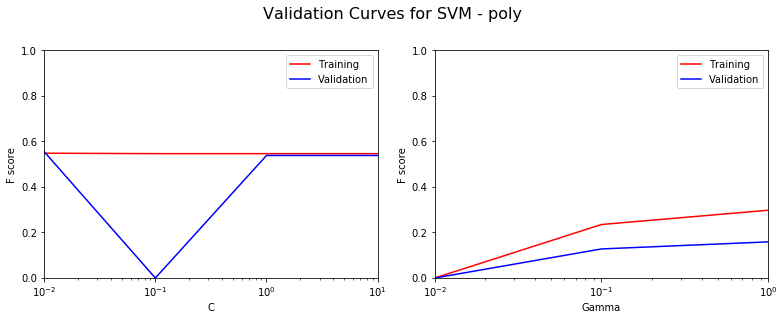

In [46]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

results["f_val"][1] = 0
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("C")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((0.01, 10))
ax[0].set_xscale("log")
    
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Gamma")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((0.01, 1))
ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM - poly", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [47]:
#no of layers
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 1, gamma = 1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [0.01, 0.1, 1, 10, 100]
for i, param in enumerate(l):
    learner = learner.set_params(C = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))
    
#no of neurons
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 10, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(l):
    learner = learner.set_params(gamma  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))
    
    

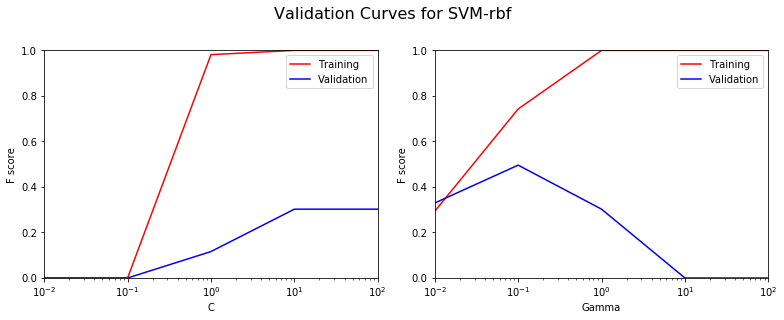

In [48]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("C")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((0.01, 100))
ax[0].set_xscale("log")
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Gamma")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((0.01, 100))
ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM-rbf", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [49]:
#Kernel type
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 10, gamma = 0.1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
kernel = {"linear", "poly", "rbf", "sigmoid"}
for i, param in enumerate(kernel):
    learner = learner.set_params(kernel = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))
    
# degree of poly  
learner = svm.SVC(random_state=42, kernel = 'poly', C = 0.1, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
degree = [1, 2, 3, 4, 5]
for i, param in enumerate(degree):
    learner = learner.set_params(degree  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))

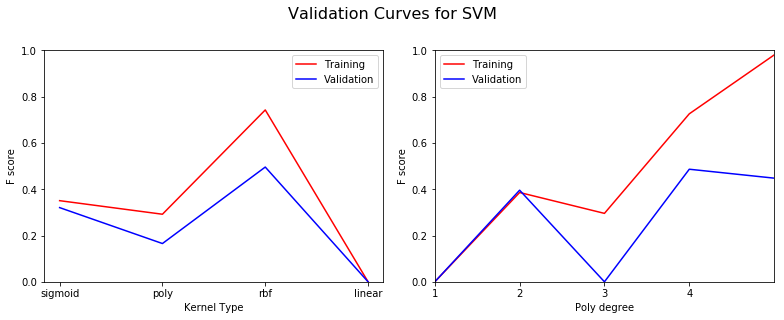

In [50]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
#ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("Kernel Type")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
#ax[0].set_xlim((0.01, 100))
#ax[0].set_xscale("log")
    
# max_leaf_size
results2["f_val"][2] = 0
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 5)))
ax[1].legend()
ax[1].set_xlabel("Poly degree")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 5))
#ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [51]:
final_svm = svm.SVC(random_state=42,  kernel = 'rbf', C = 10, gamma = 0.1)
final_svm = final_svm.fit(X_train_std, y_train)
val_predictions = final_svm.predict(X_val_std)
final_predictions = final_svm.predict(X_test_std)
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions,beta=1.)))

Final F-score on the testing data: 0.4642


In [ ]:
final_svm.

# KNN Hyperparameter Optimization

In [84]:
#no of layers
learner = KNeighborsClassifier(n_neighbors=1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = list(range(1,100))
for i, param in enumerate(l):
    learner = learner.set_params(n_neighbors = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))
    
#no of neurons
learner = KNeighborsClassifier(n_neighbors=5)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
l = ["uniform", "distance"]
for i, param in enumerate(l):
    learner = learner.set_params(weights  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.))
    
    

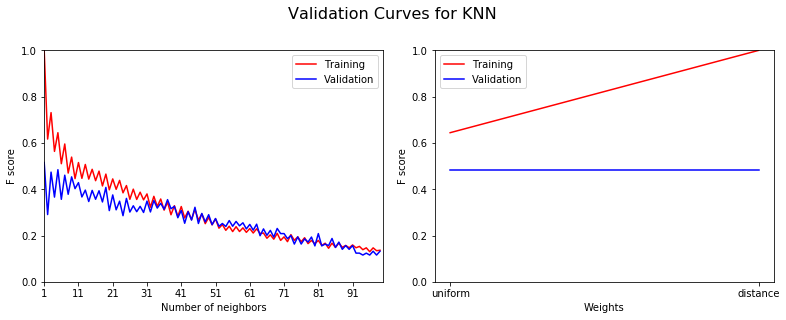

In [85]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("Number of neighbors")
ax[0].set_ylabel("F score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 100))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
#ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Weights")
ax[1].set_ylabel("F score")
ax[1].set_ylim((0, 1))
#ax[1].set_xlim((0.01, 10))


# Aesthetics
pl.suptitle("Validation Curves for KNN", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [86]:
final_knn = KNeighborsClassifier(n_neighbors=1)
final_knn = final_knn.fit(X_train_std, y_train)
final_predictions = final_svm.predict(X_test_std)
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions,beta=1.)))

Final Precision score on the testing data: 0.4642
